# Heart Disease Prediction

In this project, we will be prediciting whether a person has heart disease or not based on the attributes given

<b> Importing Libraries <b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
file_path = '/Users/monicaleo/Downloads/heartd.csv'

In [5]:
hd = pd.read_csv(file_path)

In [6]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<font size="4"> <b> Exploratory Data Analysis </font> <b>

In [7]:
hd.shape

(303, 14)

In [8]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Checking for null values
hd.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values!

In [14]:
# Count of number of patients with heart disease and without
hd['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

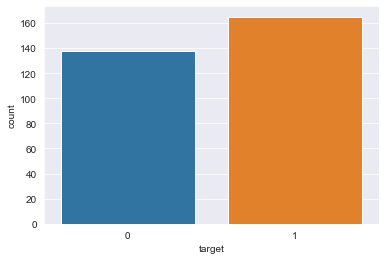

In [15]:
sns.set_style("darkgrid")
sns.countplot(x='target',data=hd)

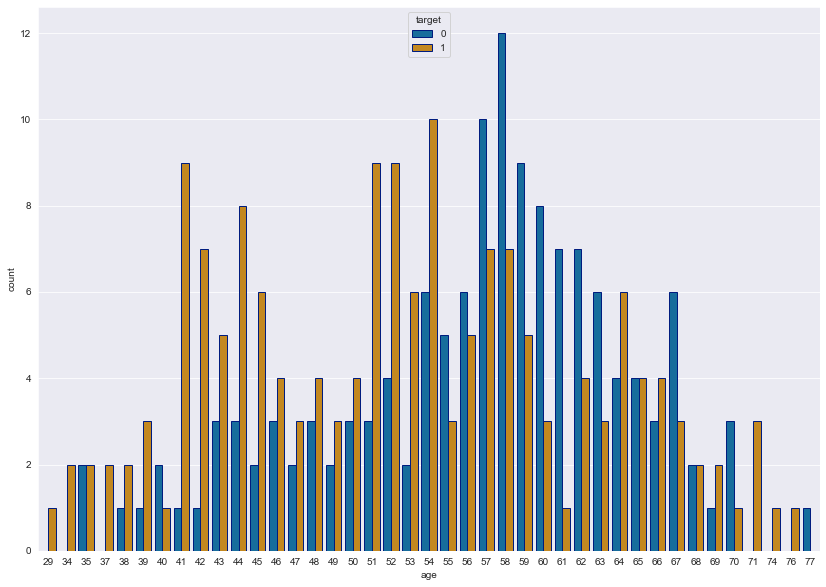

In [17]:
plt.figure(figsize=(14,10))
sns.countplot(x='age', hue='target', data = hd, palette = 'colorblind',edgecolor = sns.color_palette('dark',n_colors = 1))

In [18]:
# Correlation
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


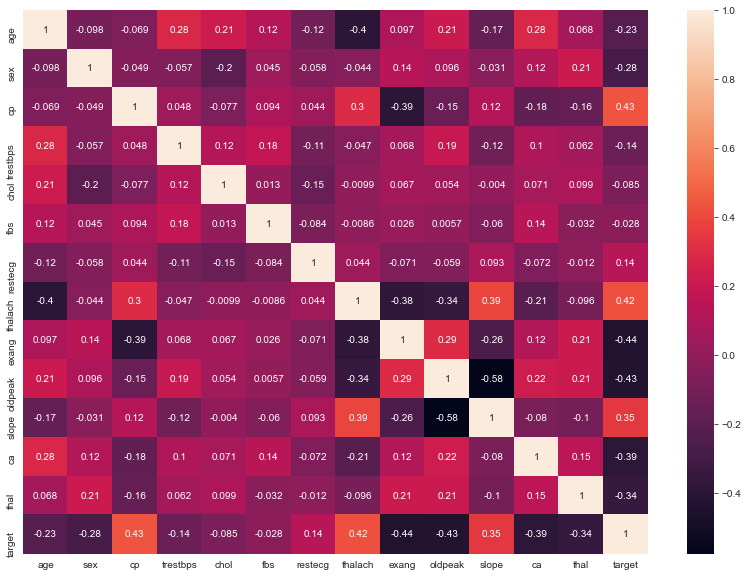

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(hd.corr(), annot= True)

<font size="4"> <b> Splitting and Scaling the Data </font> <b>

In [20]:
X = hd.iloc[:, :-1].values
Y = hd.iloc[:, -1].values

In [21]:
# Train-test split 30-70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, 
                                                    random_state=101)

In [22]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<font size="4"> <b> Models and Accuracy </font> <b>

In [30]:
def models(X_train,y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    decision_tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
    random_forest.fit(X_train, y_train)
    
    #Model Accuracy on Training Data
    print('[0]Logistic Regression Training Acc:', log.score(X_train,y_train))
    print('[1]Decision Tree Training Acc:', decision_tree.score(X_train,y_train))
    print('[2]Random Forest Training Acc:', random_forest.score(X_train,y_train))
    
    return log, decision_tree, random_forest

In [31]:
model = models(X_train,y_train)

[0]Logistic Regression Training Acc: 0.8537735849056604
[1]Decision Tree Training Acc: 1.0
[2]Random Forest Training Acc: 0.9952830188679245


In [32]:
# Acc on Testing Data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    print('Model ', i)
    cm = confusion_matrix(y_test, model[i].predict(X_test))

    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[1][0]
    fn = cm[0][1]

    print(cm)
    print('Testing Acc = ', (tp + tn)/(tp +tn +fn + fp))
    print()

Model  0
[[34 10]
 [ 3 44]]
Testing Acc =  0.8571428571428571

Model  1
[[33 11]
 [ 2 45]]
Testing Acc =  0.8571428571428571

Model  2
[[35  9]
 [11 36]]
Testing Acc =  0.7802197802197802



<font size="4"> <b> Predictions </font> <b>

In [27]:
# Logistic Regression
pred = model[0].predict(X_test)
print(pred)
print()
print(y_test)

[0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]

[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]


In [28]:
# Decision Tree
pred = model[1].predict(X_test)
print(pred)
print()
print(y_test)

[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0]

[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]


In [29]:
# Random Forest
pred = model[1].predict(X_test)
print(pred)
print()
print(y_test)

[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0]

[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]
